# Name: Danting Yang UMID:10713088

## SI 670 Applied Machine Learning, Week 2:  Basic supervised learning concepts (Due 09/21 11:59pm)

For this assignment, you will be exercising on questions related to linear regression, polynomial feature expansion, underfitting/overfitting, and cross-validation.

There are six questions, for a total of 100 points. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

Submit your completed notebook file to the Canvas site - IMPORTANT: please name your submitted file si670-hw2-youruniqname.ipynb and be sure to put your name at the top of your notebook file.

As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates: if you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.

### Preliminary
First, run the following block to set up the variables needed for later sections.

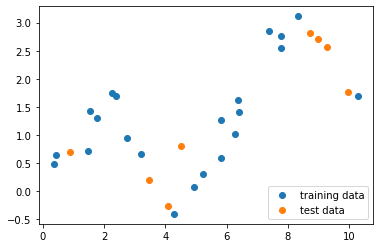

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 30
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x / 4 + np.random.randn(n) / 3


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
    
part1_scatter()

### Question 1 (20 points)

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="si670f18_assn2_q1.png" style="width: 200px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [9]:
# 方法一
def answer_one0():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    # Your code here
    res = np.zeros((4,100))
    
    for i, degree in enumerate([1,3,6,9]):
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X_train.reshape(22,1))
        linreg = LinearRegression().fit(X_poly, y_train)
        y = linreg.predict(poly.fit_transform(np.linspace(0,10,100).reshape(100,1)));
        res[i,:] = y
    return np.array(res)

answer_one0()

array([[ 0.49947299,  0.51663261,  0.53379223,  0.55095185,  0.56811148,
         0.5852711 ,  0.60243072,  0.61959034,  0.63674996,  0.65390958,
         0.6710692 ,  0.68822883,  0.70538845,  0.72254807,  0.73970769,
         0.75686731,  0.77402693,  0.79118655,  0.80834617,  0.8255058 ,
         0.84266542,  0.85982504,  0.87698466,  0.89414428,  0.9113039 ,
         0.92846352,  0.94562315,  0.96278277,  0.97994239,  0.99710201,
         1.01426163,  1.03142125,  1.04858087,  1.06574049,  1.08290012,
         1.10005974,  1.11721936,  1.13437898,  1.1515386 ,  1.16869822,
         1.18585784,  1.20301747,  1.22017709,  1.23733671,  1.25449633,
         1.27165595,  1.28881557,  1.30597519,  1.32313482,  1.34029444,
         1.35745406,  1.37461368,  1.3917733 ,  1.40893292,  1.42609254,
         1.44325216,  1.46041179,  1.47757141,  1.49473103,  1.51189065,
         1.52905027,  1.54620989,  1.56336951,  1.58052914,  1.59768876,
         1.61484838,  1.632008  ,  1.64916762,  1.6

In [7]:
#方法二
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
         
    # Your code here
    degree = [1, 3, 6, 9]
    np_value = 100
    res = np.zeros([len(degree), np_value])
    predict = np.linspace(0, 10, np_value).reshape(-1, 1)
    X_tr = X_train.reshape(-1, 1)  
    
    for i, degree in enumerate(degree):
        poly = PolynomialFeatures(degree=degree)
        X_ = poly.fit_transform(X_tr)
        predict_ = poly.fit_transform(predict)
        linreg = LinearRegression()
        linreg.fit(X_, y_train)
        res[i, :] = linreg.predict(predict_)
    
    return np.array(res)

answer_one()

array([[ 0.49947299,  0.51663261,  0.53379223,  0.55095185,  0.56811148,
         0.5852711 ,  0.60243072,  0.61959034,  0.63674996,  0.65390958,
         0.6710692 ,  0.68822883,  0.70538845,  0.72254807,  0.73970769,
         0.75686731,  0.77402693,  0.79118655,  0.80834617,  0.8255058 ,
         0.84266542,  0.85982504,  0.87698466,  0.89414428,  0.9113039 ,
         0.92846352,  0.94562315,  0.96278277,  0.97994239,  0.99710201,
         1.01426163,  1.03142125,  1.04858087,  1.06574049,  1.08290012,
         1.10005974,  1.11721936,  1.13437898,  1.1515386 ,  1.16869822,
         1.18585784,  1.20301747,  1.22017709,  1.23733671,  1.25449633,
         1.27165595,  1.28881557,  1.30597519,  1.32313482,  1.34029444,
         1.35745406,  1.37461368,  1.3917733 ,  1.40893292,  1.42609254,
         1.44325216,  1.46041179,  1.47757141,  1.49473103,  1.51189065,
         1.52905027,  1.54620989,  1.56336951,  1.58052914,  1.59768876,
         1.61484838,  1.632008  ,  1.64916762,  1.6

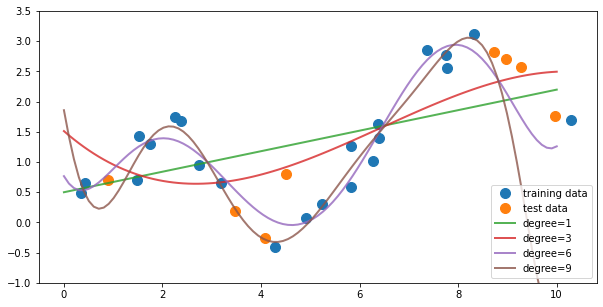

In [10]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,3.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 2 (20 points)

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

Based on the $R^2$ scores above (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? Note: there may be multiple correct solutions to this question.

(Hint: you can plot the r2_train and r2_test vs the degree to investigate underfitting/overfitting.)

*This function should return one tuple of numpy arrays `(r2_train, r2_test, Underfitting, Good_Generalization, Overfitting)`, where both `r2_train` and `r2_test` should have shape `(10,)`, and `Underfitting, Good_Generalization, Overfitting` should be three lists of int partitioning 0-9.*

In [89]:
# # Peilin Answer
# np.random.seed(0)
# n = 100
# x = np.linspace(0, 10, n) + np.random.randn(n) / 5
# y = np.sin(x) + x / 4 + np.random.randn(n) 
# X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# def answer_two0():
#     from sklearn.linear_model import LinearRegression
#     from sklearn.preprocessing import PolynomialFeatures

#     # Your code here
#     r2_train, r2_test= [], []
#     for degree in range(10):
#         X_train_poly = PolynomialFeatures(degree=degree).fit_transform(X_train.reshape(-1,1))
#         X_test_poly = PolynomialFeatures(degree=degree).fit_transform(X_test.reshape(-1,1))
#         clf = LinearRegression().fit(X_train_poly,y_train)
#         r2_train.append(clf.score(X_train_poly, y_train))
#         r2_test.append(clf.score(X_test_poly, y_test))  
#     return (r2_train, r2_test)

# def answer_two():
#     r2_train, r2_test = answer_two0()
#     Good_Generalization = list(r2_test).index(max(r2_test))
#     Underfitting = list(r2_test).index(min(r2_test[:Good_Generalization]))
#     Overfitting = list(r2_test).index(min(r2_test[Good_Generalization:]))   
              
#     return (r2_train, r2_test, Underfitting, Good_Generalization, Overfitting)
# answer_two()

([0.0,
  0.15514354415029286,
  0.30116550158794964,
  0.3029819976207113,
  0.35939823784701974,
  0.41325991558424735,
  0.4210382007411466,
  0.43027673058596627,
  0.4485309334854215,
  0.44881874114327247],
 [-0.010053796470642862,
  0.03783857335776575,
  -0.001764298726620428,
  0.009258499715558921,
  0.18206459265690889,
  0.38656175968315276,
  0.4144092871888445,
  0.351181904797216,
  0.2612624766521242,
  0.24989269828256366],
 0,
 6,
 9)

In [11]:
np.random.seed(0)
n = 100
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x / 4 + np.random.randn(n) 
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # Your code here
    r2_train = []
    r2_test = []

    for d in range(10):
        poly = PolynomialFeatures(degree=d)
        X_train_trans = poly.fit_transform(X_train.reshape(-1, 1))
        linreg = LinearRegression().fit(X_train_trans, y_train)
        X_test_trans = poly.transform(X_test.reshape(-1, 1))
        
        r2_train.append(linreg.score(X_train_trans, y_train))
        r2_test.append(linreg.score(X_test_trans, y_test))
    
    Underfitting = [0, 1, 2, 3, 4] 
    Good_Generalization = [5, 6, 7]
    Overfitting = [8, 9]
    # for good generalization, answers around 6 are correct(eg. [5,6,7], [5,6], [6], [6, 7]), 6 must be included
    # you need to classify all degree models for full credit.

    return (r2_train, r2_test, Underfitting, Good_Generalization, Overfitting)

answer_two()

([0.0,
  0.15514354415029286,
  0.30116550158794964,
  0.3029819976207113,
  0.35939823784701974,
  0.41325991558424735,
  0.4210382007411466,
  0.43027673058596627,
  0.4485309334854215,
  0.44881874114327247],
 [-0.010053796470642862,
  0.03783857335776575,
  -0.001764298726620428,
  0.009258499715558921,
  0.18206459265690889,
  0.38656175968315276,
  0.4144092871888445,
  0.351181904797216,
  0.2612624766521242,
  0.24989269828256366],
 [0, 1, 2, 3, 4],
 [5, 6, 7],
 [8, 9])

### Question 3 (10 points)

This question asks you to explore the influence of varying the training size proportion on the model's performance. Specifically, we hope you adopt the  train_size parameter in train_test_split function. 

Please use a for loop to repeat the following steps with `train_size` varying from `[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]`:
1. Generate synthetic data `(X_F1, y_F1)` using `make_friedman1` with `n_samples=1000, n_features=5, random_state=0`;
2. Apply `train_test_split` to split the generated synthetic data and got your `X_train, X_test, y_train, y_test` correspondingly. Please set `random_state=0` in`train_test_split` function to generate the data. 
3. Create a `LinearRegression` model
4. For each model compute the $R^2$ (coefficient of determination) regression score. 

Store the $R^2$ of each model in list `r_squared` and return the list. Do you see the $R^2$ increasing or decreasing? And why? 

*This function should return a list `r_squared`, with length 9.*


In [12]:
def answer_three():
    from sklearn.datasets import make_friedman1
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    
    r_squared = []
    for train_size in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        # Your code here
        X_F1, y_F1 = make_friedman1(n_samples=1000, n_features=5, random_state=0)
        X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state=0, train_size=train_size)
        
        linreg = LinearRegression().fit(X_train, y_train)
        y_pred = linreg.predict(X_test)
        #print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))
        r_squared.append(linreg.score(X_test, y_test))
    
    return r_squared

answer_three()

[0.738413532493281,
 0.7392569010143397,
 0.7513848505116703,
 0.745987907340038,
 0.7662066366447913,
 0.7760430184222653,
 0.7558631122685722,
 0.7797378250939617,
 0.7922372391817742]

### Question 4 (20 points)

This question asks you to compare the Linear Regression model and KNN Regression model. As you know, choosing the k in k-NN Regression model affects the prediction accuracy. In this question, train k-NN classifiers with `k = 1,2,...,5` (similar to HW1 Q5) and report the best performance of KNN Regression and Linear Regression. 

In this question we will fix the `train_size = 0.8`, you'll need to the following things:
1. Generate synthetic data `(X_F1, y_F1)` using `make_friedman1` with `n_samples=10000, n_features=10, random_state=0`;
2. Apply `train_test_split` to split the generated synthetic data and got your `X_train, X_test, y_train, y_test` correspondingly.Set `random_state=0` in`train_test_split` function to generate the data. 
3. Create a `LinearRegression` model and get its performenace.
4. Create a `KNeighborsRegressor` model and get the performance when `k = 1,5, 10, 15, 205`
5. Return the an array with 6 items: the first being the  `LinearRegression` model's $R^2$ and next 5 the `KNeighborsRegressor` models' $R^2$

*This function should return an array with 6 numbers.*

Which classifier performed the best?  Using the ideas from class, what could explain these results? 

In [13]:
def answer_four():
    from sklearn.datasets import make_friedman1
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsRegressor
    
    scores = []
    # Your code here
    train_size = 0.8
    X_F1, y_F1 = make_friedman1(n_samples=10000, n_features=10, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X_F1, y_F1, random_state=0, train_size=train_size)
        
    linreg = LinearRegression().fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    scores = []
    scores.append(linreg.score(X_test, y_test))

    

    for k in [1, 5, 10, 15, 205]:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
        
    return scores

answer_four()

[0.7430653473594293,
 0.667995745956579,
 0.8428177919919698,
 0.8554736492383892,
 0.8536243420979374,
 0.7354516334161025]

### Question 5 (20 points)

From Question 1 and 2 we have seen that we need to be careful when selecting the `degree` parameter of the polynomial feature expansion. These kind of parameters are ususally called "hyper-parameters" in machine learning. In this question, we will see how to make a good choice of the hyper-parameter(s). And when the dataset is small, cross validation can help us make a more reliable choice. 



In [14]:
def answer_five():
    import numpy as np
    from sklearn.datasets import make_friedman3
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.model_selection import cross_val_score

    # generate dta
    X_F3_train, y_F3_train = make_friedman3(n_samples=100, random_state=0)  # training set
    X_F3_test, y_F3_test = make_friedman3(n_samples=500, random_state=1)  # hold-out test set

    r2_cv = []
    r2_one_split = []
    for d in range(1, 6):
        
        # %%% Your code: transform `X_F3_train` to `X_F3_train_trans` using `PolynomialFeatures` with `degree=d`
        poly = PolynomialFeatures(degree=d)
        X_F3_train_trans = poly.fit_transform(X_F3_train)
        
        # train and evaluate with one split
        X_train, X_valid, y_train, y_valid = train_test_split(X_F3_train_trans, y_F3_train, random_state=0, test_size=0.1)
        linreg = LinearRegression().fit(X_train, y_train)
        r2_one_split.append(linreg.score(X_valid, y_valid))

        # train and evaluate with cross validation
        linreg = LinearRegression()
        
        # %%% Your code: get `cv_scores` by applying `cross_val_score` on `linreg, X_F3_train_trans, y_F3_train` with `cv=10`
        cv_scores = cross_val_score(linreg, X_F3_train_trans, y_F3_train, cv=10)
        r2_cv.append(np.mean(cv_scores))

    # evalutate on the hold-out test set
    d_one_split = np.argmax(r2_one_split)  # get the best degree on the one-split validation set
    poly = PolynomialFeatures(degree=d_one_split)
    X_F3_train_trans = poly.fit_transform(X_F3_train)
    linreg = LinearRegression().fit(X_F3_train_trans, y_F3_train)
    X_F3_test_trans = poly.transform(X_F3_test)
    score_one_split = linreg.score(X_F3_test_trans, y_F3_test)
    print('One split:\tDegree {}, R-squared score {:.3f}'
         .format(d_one_split, linreg.score(X_F3_test_trans, y_F3_test)))

    d_cv = np.argmax(r2_cv)  # get the best degree on the cross validation set
    poly = PolynomialFeatures(degree=d_cv)
    X_F3_train_trans = poly.fit_transform(X_F3_train)
    linreg = LinearRegression().fit(X_F3_train_trans, y_F3_train)
    X_F3_test_trans = poly.transform(X_F3_test)
    score_cv = linreg.score(X_F3_test_trans, y_F3_test)
    print('Cross Valid:\tDegree {}, R-squared score {:.3f}'
         .format(d_cv, linreg.score(X_F3_test_trans, y_F3_test)))
    
    return (d_one_split, score_one_split, d_cv, score_cv)

answer_five()

One split:	Degree 2, R-squared score 0.751
Cross Valid:	Degree 1, R-squared score 0.528


(2, 0.7508642440832378, 1, 0.527985223041981)

### Question 6 (10 points)
In class and in the lab, we have studied the polynomial feature expansion. In this question, we hope you to write out the polynomial features after expansion when given different number of features and different degrees. 

In this question, you need to answer the number of feature after polynomial feature expansion to a train data with 4 features with degree 2. Assumer the original features are [a, b, c, d], please tell us what the features are after polynomial feature expansion (order doesn't matter) and number of features. 

Bascially, you need to answer with a list containing [a, b, ...] representation the features after expansion and a number denoting the total number of features after expansion. 

*Note that we hope you calculate this question by hand, not use python*

In [16]:
from sklearn.preprocessing import PolynomialFeatures

def answer_six():
    X_train = np.array([[-1, 2, 3, 5]])
    
    poly2 = PolynomialFeatures(degree=2)
    X_after2 = poly2.fit_transform(X_train) 
    
    return X_after2

answer_six()

array([[ 1., -1.,  2.,  3.,  5.,  1., -2., -3., -5.,  4.,  6., 10.,  9.,
        15., 25.]])